In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model
import os
import numpy as np
import time
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.preprocessing import image


In [3]:
pwd

'/home/gauravkai018352/Classiciaction_animals'

In [4]:
img_path = '/home/gauravkai018352/Classiciaction_animals/data/horses/horse-1.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = np.array(img,dtype=np.float32)
print (x.shape)
x1 = np.expand_dims(x, axis=0) #expand_dims() is used to add the number of images: x.shape = (1, 224, 224, 3)
print (x1.shape)
#x2 = preprocess_input(x1) #preprocess_input subtracts the mean RGB channels of the imagenet dataset. This is because the model you are using has been trained on a different dataset: x.shape is still (1, 224, 224, 3)
#print('Input image shape:', x2.shape)

(224, 224, 3)
(1, 224, 224, 3)


In [5]:
x.shape

(224, 224, 3)

In [6]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")


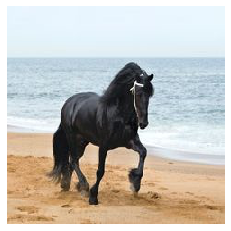

In [7]:
plot_image(img)

In [8]:
# Let us convert the coloured image into a grayscale image (image_grayscale), by replacing the values which are along the axis=2, by their mean value.
image_grayscale = np.squeeze(x1).mean(axis=2).astype(np.float32)

In [9]:
image_grayscale.shape

(224, 224)

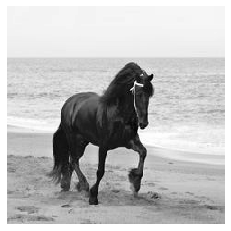

In [10]:
plot_image(image_grayscale)

(224, 224)

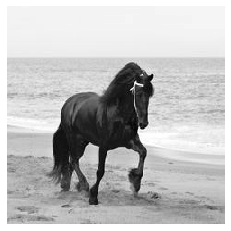

In [11]:
from skimage.color import rgb2gray
img_gray = rgb2gray(x)
plot_image(img_gray)
img_gray.shape

In [12]:
# Loading the training data
PATH = os.getcwd()
# Define data path
data_path = PATH + '/data'
data_dir_list = os.listdir(data_path)


In [13]:
data_dir_list

['Humans', 'dogs', 'horses', 'cats']

In [14]:
for word in data_dir_list[:]:
    if word.startswith('.'):
        data_dir_list.remove(word)

In [15]:
data_dir_list

['Humans', 'dogs', 'horses', 'cats']

In [16]:
img_data_list=[]
for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        img_path = data_path + '/'+ dataset + '/'+ img
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img) #np.array
        x = np.expand_dims(x, axis=0)
        #x = preprocess_input(x)
        print('Input image shape:', x.shape)
        img_data_list.append(x)

Loaded the images of dataset-Humans

Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224,

Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 

Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 

Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 

In [17]:
img_data = np.array(img_data_list)
#img_data = img_data.astype('float32')
print (img_data.shape)
img_data=np.rollaxis(img_data,1,0)
print (img_data.shape)
img_data=img_data[0]
print (img_data.shape)

(808, 1, 224, 224, 3)
(1, 808, 224, 224, 3)
(808, 224, 224, 3)


In [18]:
img_data[0].shape

(224, 224, 3)

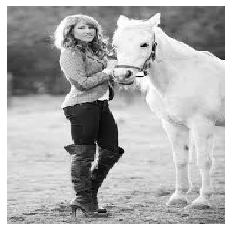

In [19]:
plot_image(img_data[0,:,:,1])

In [20]:
height, width, channels = img_data[0].shape

In [21]:
img_data[0].shape

(224, 224, 3)

In [22]:
num_classes = 4
num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:202]=0
labels[202:404]=1
labels[404:606]=2
labels[606:]=3

In [23]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [24]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
#Shuffle the dataset
x,y = shuffle(img_data,labels, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=2)

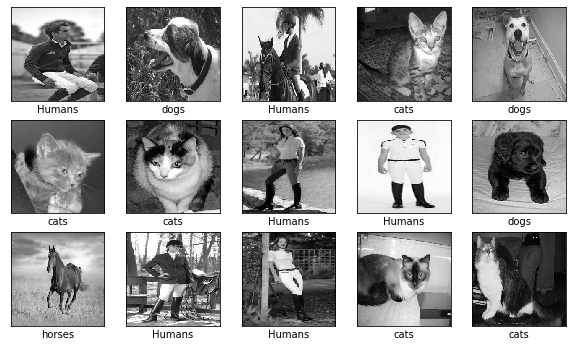

In [25]:
# Let us plot some training images to see how they look
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i,:,:,1],cmap="gray", interpolation="nearest")
    plt.xlabel(data_dir_list[y_train[i]])
plt.show()

In [26]:
X_train.shape

(606, 224, 224, 3)

In [27]:
X_test.shape

(202, 224, 224, 3)

In [28]:
X_train = X_train/255
X_test = X_test/255

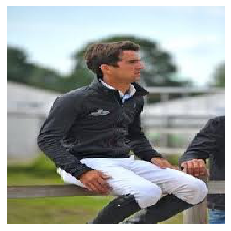

In [29]:
plot_image(X_train[0])

In [30]:
x_train_gray = X_train.mean(axis=3)
x_test_gray = X_test.mean(axis=3)

In [31]:
x_train_gray.shape

(606, 224, 224)

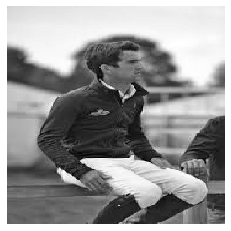

In [32]:
plot_image(x_train_gray[0])

In [33]:
x_train_reshaped = x_train_gray.reshape((606, 224, 224, 1))
x_test_reshaped = x_test_gray.reshape((202, 224, 224, 1))

In [34]:
x_train_reshaped.shape

(606, 224, 224, 1)

In [35]:
x_train_reshaped[0]

array([[[0.83267975],
        [0.83267975],
        [0.8366013 ],
        ...,
        [0.9150327 ],
        [0.9111111 ],
        [0.90718955]],

       [[0.83267975],
        [0.83660126],
        [0.83660126],
        ...,
        [0.9150327 ],
        [0.9111111 ],
        [0.9111111 ]],

       [[0.84052294],
        [0.84052294],
        [0.84444445],
        ...,
        [0.9254902 ],
        [0.92156863],
        [0.91764706]],

       ...,

       [[0.37385622],
        [0.38562092],
        [0.39869282],
        ...,
        [0.32941177],
        [0.33333334],
        [0.3764706 ]],

       [[0.3895425 ],
        [0.3895425 ],
        [0.39346406],
        ...,
        [0.3503268 ],
        [0.3777778 ],
        [0.3869281 ]],

       [[0.3895425 ],
        [0.3895425 ],
        [0.39346406],
        ...,
        [0.46013072],
        [0.49542484],
        [0.50849676]]], dtype=float32)

The pixel values for the images lie between 0 to 255 now, which is a large range.

Let us normalize these values to a range from 0 to 1. Or To do this, we can simply divide each pixel value with 255

In [37]:
from functools import partial

DefaultConv2D = partial(layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")


In [35]:
#conv1 = layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=(224,224,1) )
#conv2 = layers.Conv2D(64,kernel_size = (3,3), activation='relu')
#conv3 = layers.Conv2D(128, kernel_size = (3,3), activation='relu')
#Creating first Max. Pooling Layer
#max_pool_1 = layers.MaxPooling2D((2,2))

#Creating second Max. Pooling Layer
#max_pool_2 = layers.MaxPooling2D((2,2))

#Creating third Max. Pooling Layer
#max_pool_3 = layers.MaxPooling2D((2,2))

In [36]:
#flat_layer = layers.Flatten()
#fc = layers.Dense(128, activation='relu')
#output = layers.Dense(4, 'softmax')

In [37]:
# Creating first dropout layer (for the first Conv. layer 'conv1')
#drop_1 = layers.Dropout(0.5)
# Creating second dropout layer (for the second Conv. layer 'conv2')
#drop_2 = layers.Dropout(0.5)
# Creating third dropout layer (for the third Conv. layer 'conv3')
#drop_3 = layers.Dropout(0.5)

In [36]:
model = models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[224, 224, 1]),
    layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    layers.MaxPooling2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    layers.Dense(units=64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(units=10, activation='softmax'),
])

W0617 17:30:23.701457 140538117551936 deprecation.py:506] From /usr/local/anaconda/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [ ]:
new_model = models.Sequential()
new_model.add(conv1)
# No Pooling Layer and Dropout layer for first Convolutional layer 'conv1'
new_model.add(conv2)
new_model.add(max_pool_2)
new_model.add(drop_2)
new_model.add(conv3)
new_model.add(max_pool_3)
new_model.add(drop_3)
new_model.add(flat_layer)
new_model.add(fc)
new_model.add(output)

In [39]:
new_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [37]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [52]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 224, 224, 64)      3200      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 56, 56, 256)       295168    
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 56, 56, 256)      

In [40]:
# Let us see what all layers our model has

new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 128)     73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 128)       0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 54, 54, 128)       0

In [41]:
new_model.fit(x_train_norm, y_train, epochs=20, batch_size=5, shuffle=True, validation_split=0.1)

Train on 545 samples, validate on 61 samples
Epoch 1/20
545/545 [==============================] - 97s 178ms/sample - loss: 2.2232 - acc: 0.2991 - val_loss: 1.3905 - val_acc: 0.1803
Epoch 2/20
545/545 [==============================] - 99s 182ms/sample - loss: 1.3572 - acc: 0.3725 - val_loss: 1.3654 - val_acc: 0.2131
Epoch 3/20
545/545 [==============================] - 93s 170ms/sample - loss: 1.2569 - acc: 0.4294 - val_loss: 1.0616 - val_acc: 0.5410
Epoch 4/20
545/545 [==============================] - 96s 176ms/sample - loss: 0.9296 - acc: 0.6367 - val_loss: 1.2533 - val_acc: 0.4590
Epoch 5/20
545/545 [==============================] - 84s 154ms/sample - loss: 0.5514 - acc: 0.7872 - val_loss: 1.1280 - val_acc: 0.5410
Epoch 6/20
545/545 [==============================] - 88s 161ms/sample - loss: 0.2896 - acc: 0.8881 - val_loss: 1.3298 - val_acc: 0.6230
Epoch 7/20
545/545 [==============================] - 89s 163ms/sample - loss: 0.1491 - acc: 0.9468 - val_loss: 3.4448 - val_acc: 0.3

In [ ]:
model.fit(x_train_norm, y_train, epochs=20, batch_size=5, shuffle=True, validation_split=0.25)

Train on 454 samples, validate on 152 samples
Epoch 1/20
454/454 [==============================] - 158s 348ms/sample - loss: 2.2452 - acc: 0.1916 - val_loss: 1.6103 - val_acc: 0.2500
Epoch 2/20
454/454 [==============================] - 180s 395ms/sample - loss: 1.6996 - acc: 0.2467 - val_loss: 1.5220 - val_acc: 0.2697
Epoch 3/20
454/454 [==============================] - 172s 380ms/sample - loss: 1.5838 - acc: 0.2665 - val_loss: 1.4809 - val_acc: 0.2697
Epoch 4/20
454/454 [==============================] - 169s 371ms/sample - loss: 1.5549 - acc: 0.2445 - val_loss: 1.4158 - val_acc: 0.1974
Epoch 5/20
454/454 [==============================] - 162s 357ms/sample - loss: 1.5006 - acc: 0.2203 - val_loss: 1.4266 - val_acc: 0.2500
Epoch 6/20
454/454 [==============================] - 168s 371ms/sample - loss: 1.4866 - acc: 0.2533 - val_loss: 1.4120 - val_acc: 0.2697
Epoch 7/20
454/454 [==============================] - 166s 367ms/sample - loss: 1.4904 - acc: 0.2313 - val_loss: 1.4104 - val_

In [38]:
model3 = models.Sequential([
    DefaultConv2D(filters=32, kernel_size=7, input_shape=[224, 224, 1]),
    layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=64),
    layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=64),
    layers.MaxPooling2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    layers.Dense(units=4, activation='softmax'),
])

W0618 18:48:05.735358 139848758736704 deprecation.py:506] From /usr/local/anaconda/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [39]:
model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [40]:
model3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      1600      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0

In [41]:
model3.fit(x_train_reshaped, y_train, epochs=10, batch_size=5, shuffle=True, validation_split=0.20)

Train on 484 samples, validate on 122 samples
Epoch 1/10
484/484 [==============================] - 25s 52ms/sample - loss: 1.3931 - acc: 0.2541 - val_loss: 1.3838 - val_acc: 0.2459
Epoch 2/10
484/484 [==============================] - 24s 50ms/sample - loss: 1.3589 - acc: 0.3099 - val_loss: 1.3353 - val_acc: 0.3770
Epoch 3/10
484/484 [==============================] - 24s 49ms/sample - loss: 1.2455 - acc: 0.4752 - val_loss: 1.2747 - val_acc: 0.4508
Epoch 4/10
484/484 [==============================] - 23s 49ms/sample - loss: 1.2094 - acc: 0.5207 - val_loss: 1.3111 - val_acc: 0.4344
Epoch 5/10
484/484 [==============================] - 25s 52ms/sample - loss: 1.4125 - acc: 0.3264 - val_loss: 1.4732 - val_acc: 0.2705
Epoch 6/10
484/484 [==============================] - 24s 50ms/sample - loss: 1.4659 - acc: 0.2769 - val_loss: 1.4814 - val_acc: 0.2623
Epoch 7/10
484/484 [==============================] - 24s 50ms/sample - loss: 1.4792 - acc: 0.2645 - val_loss: 1.4814 - val_acc: 0.2623
Ep